In [65]:
import numpy as np
import random as rd
from tqdm import tqdm
from random import randint
import matplotlib.pyplot as plt

item_number = np.arange(1,11)
weight = (3,13,10,9,7,1,8,8,2,9)
value =(266,442,671,526,388,245,210,145,126,322)

knapsack_threshold = 35    #Maximum poids du sac 
print('Liste des articles  : ')
print('Numero.   Poids   Valeur')
for i in range(item_number.shape[0]):
    print('{0}          {1}         {2}\n'.format(item_number[i], weight[i], value[i]))


Liste des articles  : 
Numero.   Poids   Valeur
1          3         266

2          13         442

3          10         671

4          9         526

5          7         388

6          1         245

7          8         210

8          8         145

9          2         126

10          9         322



In [66]:
solutions_per_pop = 8 # nombre des chromosomes dans population initial
pop_size = (solutions_per_pop, item_number.shape[0]) 
print('taille de initial Population  = {}'.format(pop_size))  # population initial
initial_population = np.random.randint(2, size = pop_size) # initilaliser population initial aléatoire
initial_population = initial_population.astype(int)
num_generations = 150  # nombre de génération 
print('population Initial  est : \n{}'.format(initial_population))

taille de initial Population  = (8, 10)
population Initial  est : 
[[0 1 1 0 1 0 1 0 0 1]
 [1 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 1 0 0]
 [1 1 1 0 1 1 1 0 0 1]
 [1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]


In [67]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):              #calculer fitness d'une population
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int) 

def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):                                   #selection des parent a partir de fitness calculer
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

In [68]:
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.5
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]   # faire le croissement a pts
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings 

def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.4
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:  # mutaion 
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants   

In [69]:
def algorithme_genetique(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []  # pour saugarder la trace de variation
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in tqdm(range(num_generations)):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)              # appliquer cycle de algoritme génétique
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [73]:
parameters, fitness_history = algorithme_genetique(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)
print('Chromosomes ayant valeur optimal est :  \n{}'.format(parameters))
selected_items = item_number * parameters
print('\nlist des article qui peut ranger dans sac est : ')
for i in range(selected_items.shape[1]):
  if selected_items[0][i] != 0:
     print('{}\t'.format(selected_items[0][i]))

100%|██████████| 150/150 [00:00<00:00, 521.15it/s]

Last generation: 
[[1 0 1 1 0 1 0 0 1 1]
 [1 0 1 1 0 1 0 0 1 1]
 [1 0 1 1 0 1 0 0 1 1]
 [1 0 1 1 0 1 0 0 1 1]
 [1 0 1 1 0 1 0 0 1 1]
 [1 0 1 0 0 1 0 0 1 1]
 [1 0 1 1 0 1 1 0 1 1]
 [1 0 1 1 0 0 0 0 1 1]]

Fitness of the last generation: 
[2156 2156 2156 2156 2156 1630    0 1911]

Chromosomes ayant valeur optimal est :  
[array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])]

list des article qui peut ranger dans sac est : 
1	
3	
4	
6	
9	
10	


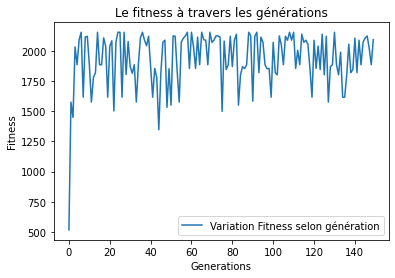

(150, 8)


In [71]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Variation Fitness selon génération')
plt.legend()
plt.title('Le fitness à travers les générations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)